In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 48s 3us/step


In [3]:
# Check the first label
train_labels[0]

1

In [4]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed
# we'll verify this below
# Here is a list of maximum indexes in every review --- we search the maximum index in this
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])


<class 'list'>


9999

In [5]:
# Let's quickly decode a review
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of se
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 4s 2us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
len(reverse_word_index)


88584

In [10]:
#PREPARING THE DATA
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all zero matrix of shape
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1 # Sets specific indices of results[i]
    return results
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [11]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
X_train.shape

(25000, 10000)

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [14]:
#MODEL DEFINATION
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\Krutika\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
optimizer=optimizers.RMSprop(learning_rate=0.001),
loss = losses.binary_crossentropy,
metrics = [metrics.binary_accuracy]
)


In [16]:
# Input for Validation - SETTING UP VALIDATION
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [17]:
#TRAINING DATA
history = model.fit(
partial_X_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(X_val, y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - binary_accuracy: 0.6877 - loss: 0.6146 - val_binary_accuracy: 0.8549 - val_loss: 0.4231
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.8914 - loss: 0.3633 - val_binary_accuracy: 0.8584 - val_loss: 0.3480
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9107 - loss: 0.2735 - val_binary_accuracy: 0.8860 - val_loss: 0.2929
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9363 - loss: 0.2051 - val_binary_accuracy: 0.8819 - val_loss: 0.2944
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.9453 - loss: 0.1720 - val_binary_accuracy: 0.8829 - val_loss: 0.2927
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.9561 - loss: 0.1427 - val_binary_accuracy: 0.8878 - val_loss: 0.2820
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - binary_accuracy: 0.9639 - loss: 0.1222 - val_binary_accuracy: 0.8854 - val_loss: 0.2894
Epoch 8/20
3

In [18]:
history_dict = history.history
history_dict.keys()


dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

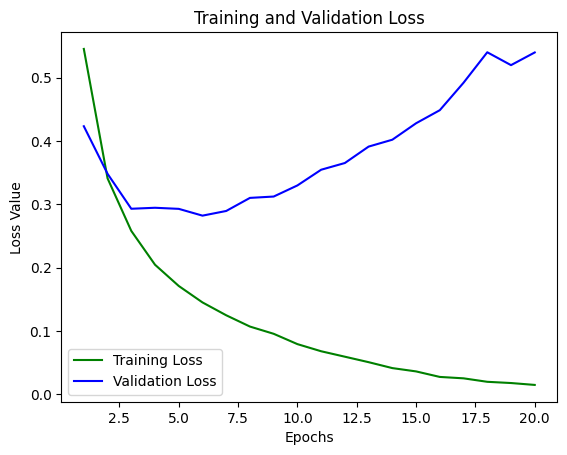

In [19]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


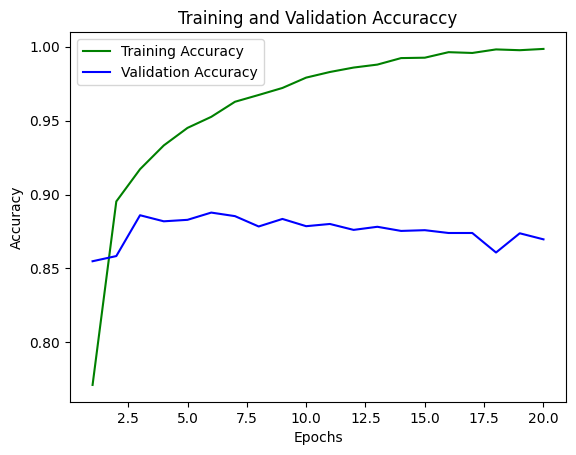

In [20]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
#RETRAINING OUR MODEL
model.fit(
partial_X_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(X_val, y_val)
)


Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - binary_accuracy: 0.9994 - loss: 0.0098 - val_binary_accuracy: 0.8712 - val_loss: 0.5595
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - binary_accuracy: 0.9998 - loss: 0.0074 - val_binary_accuracy: 0.8715 - val_loss: 0.5814
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.9994 - loss: 0.0079 - val_binary_accuracy: 0.8699 - val_loss: 0.6014


In [22]:
# Making Predictions for testing data --MODEL EVALUATION
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [23]:
result

array([[0.0127218 ],
       [0.99999994],
       [0.9710038 ],
       ...,
       [0.00149539],
       [0.01505295],
       [0.9654214 ]], dtype=float32)

In [25]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.round(score)

In [26]:
mae = metrics.mean_absolute_error(y_pred, y_test)
mae


<tf.Tensor: shape=(), dtype=float32, numpy=0.14396>